In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_name="d:/vuz/andre/dsbd/lab2/Automobile_data.csv"
fall=pd.read_csv(file_name,sep=",")

#Вдалили не потрібні строки с price '?'
fall=fall[ fall['price'] !='?']
fall['price']= pd.to_numeric(fall["price"])
#fall['price']= pd.to_numeric(fall["price"].apply(lambda x:"0" if x=='?' else x))
fall['peak-rpm']= pd.to_numeric(fall["peak-rpm"].apply(lambda x:"0" if x=='?' else x))
fall['horsepower']= pd.to_numeric(fall["horsepower"].apply(lambda x:"0" if x=='?' else x))
fall['normalized-losses']= pd.to_numeric(fall["normalized-losses"].apply(lambda x:"0" if x=='?' else x))
fall['bore']= pd.to_numeric(fall["bore"].apply(lambda x:"0" if x=='?' else x))
fall['stroke']= pd.to_numeric(fall["stroke"].apply(lambda x:"0" if x=='?' else x))
print(fall.dtypes)

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object


In [37]:

print(fall.head())


   symboling  normalized-losses         make fuel-type aspiration  \
0          3                  0  alfa-romero       gas        std   
1          3                  0  alfa-romero       gas        std   
2          1                  0  alfa-romero       gas        std   
3          2                164         audi       gas        std   
4          2                164         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   
2          two    hatchback          rwd           front        94.5  ...   
3         four        sedan          fwd           front        99.8  ...   
4         four        sedan          4wd           front        99.4  ...   

   engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0          130         mpfi  3.47    2.68       

data1: mean=11466.518 stdv=5785.770
data2: mean=122.000 stdv=35.334


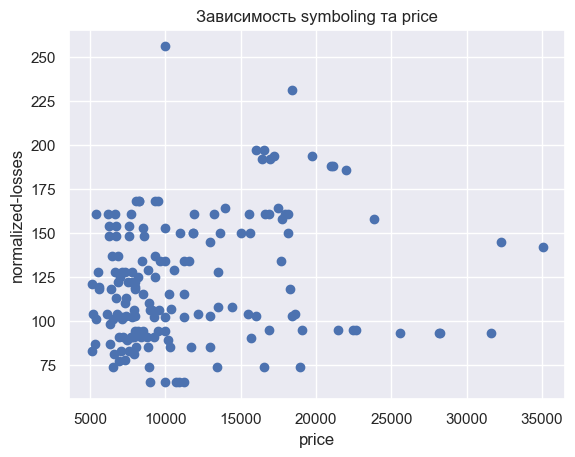

     price  normalized-losses
0     5118               83.0
1     5151              121.0
2     5195              104.0
3     5348               87.0
4     5389              161.0
..     ...                ...
145  28176               93.0
146  28248               93.0
147  31600               93.0
148  32250              145.0
149  35056              142.0

[150 rows x 2 columns]


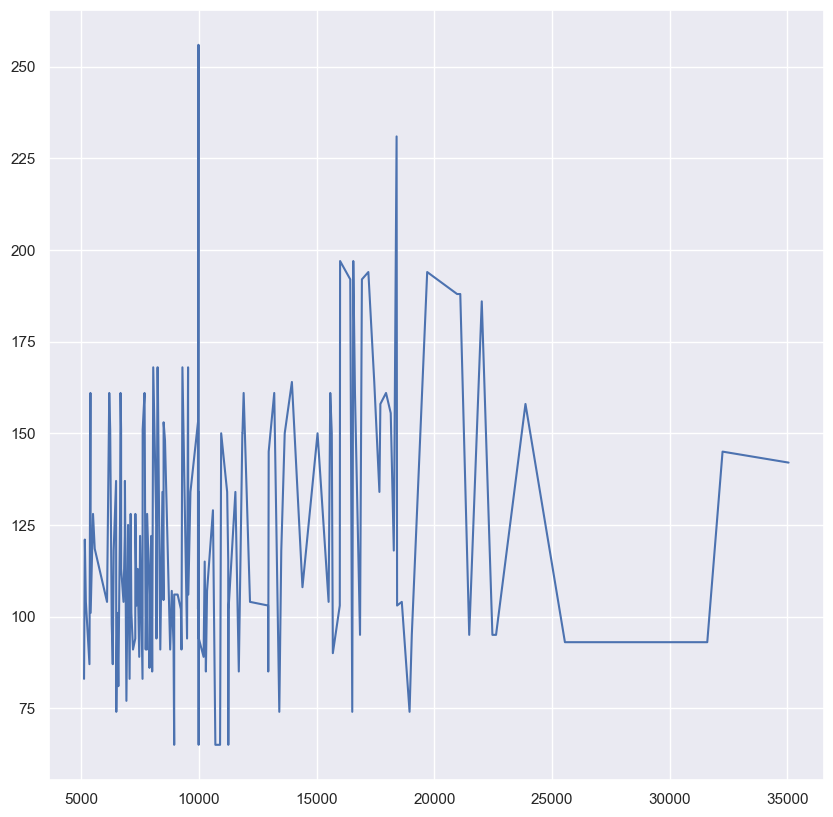

In [38]:
# generate related variables
from numpy import mean
from numpy import std

fall_new=fall[ fall['normalized-losses']>0] 

# prepare data
data1 = fall_new['price']
data2 = fall_new['normalized-losses']
# summarize
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))
# plot
plt.title('Зависимость symboling та price')
plt.xlabel('price')
plt.ylabel('normalized-losses')
plt.scatter(data1, data2)
plt.show()
#mean - середне
fall1=fall_new.groupby(["price"], as_index=False)["normalized-losses"].mean()
print(fall1)
data1 = fall1['price']
data2 = fall1['normalized-losses']
plt.figure(figsize=[10,10])
plt.plot(data1, data2)
plt.show()

data1: mean=13207.129 stdv=7927.273
data2: mean=0.841 stdv=1.252


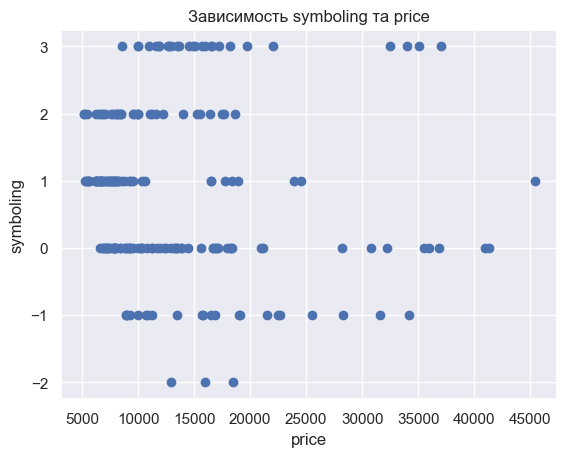

     price  symboling
0     5118        2.0
1     5151        2.0
2     5195        1.0
3     5348        1.0
4     5389        2.0
..     ...        ...
181  36880        0.0
182  37028        3.0
183  40960        0.0
184  41315        0.0
185  45400        1.0

[186 rows x 2 columns]


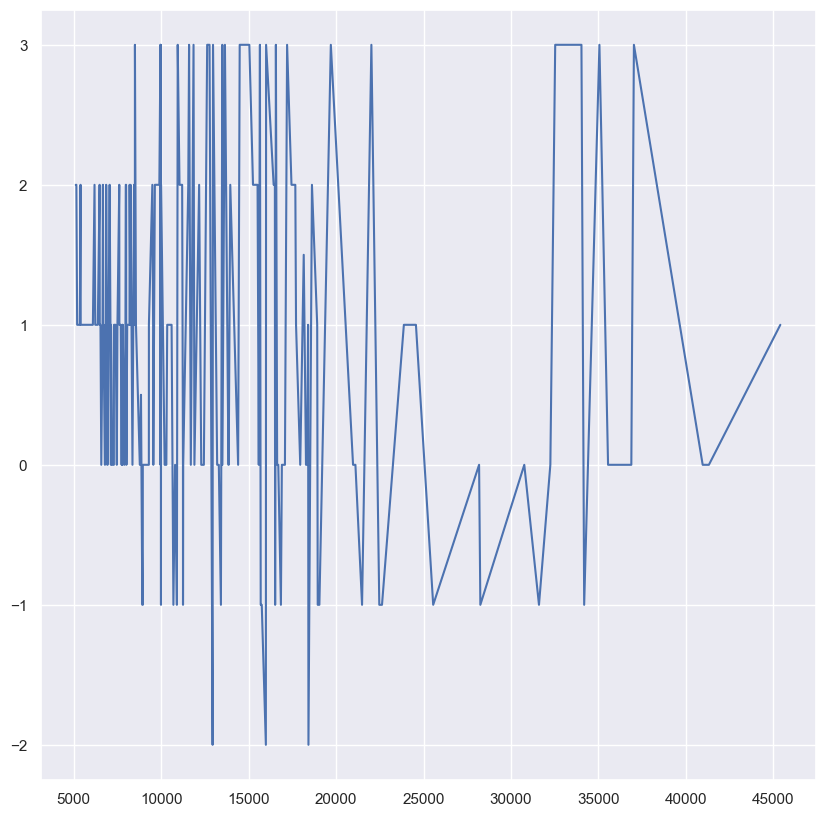

In [39]:
# generate related variables
from numpy import mean
from numpy import std


# prepare data
data1 = fall['price']
data2 = fall['symboling']
# summarize
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))
# plot
plt.title('Зависимость symboling та price')
plt.xlabel('price')
plt.ylabel('symboling')
plt.scatter(data1, data2)
plt.show()
#mean - середне
fall1=fall.groupby(["price"], as_index=False)["symboling"].mean()
print(fall1)
data1 = fall1['price']
data2 = fall1['symboling']
plt.figure(figsize=[10,10])
plt.plot(data1, data2)
plt.show()

data10: mean=12916.409 stdv=7912.973
data20: mean=104.348 stdv=39.365
data11: mean=15838.150 stdv=7563.360
data21: mean=84.450 stdv=25.301


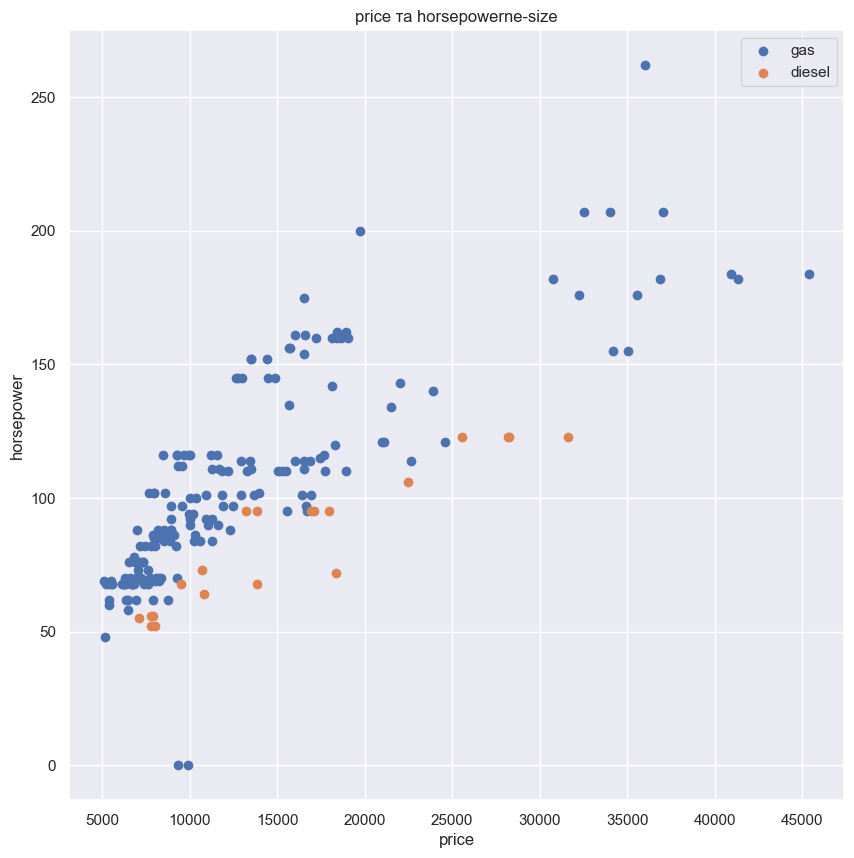

  fuel-type  price
0    diesel     20
1       gas    181


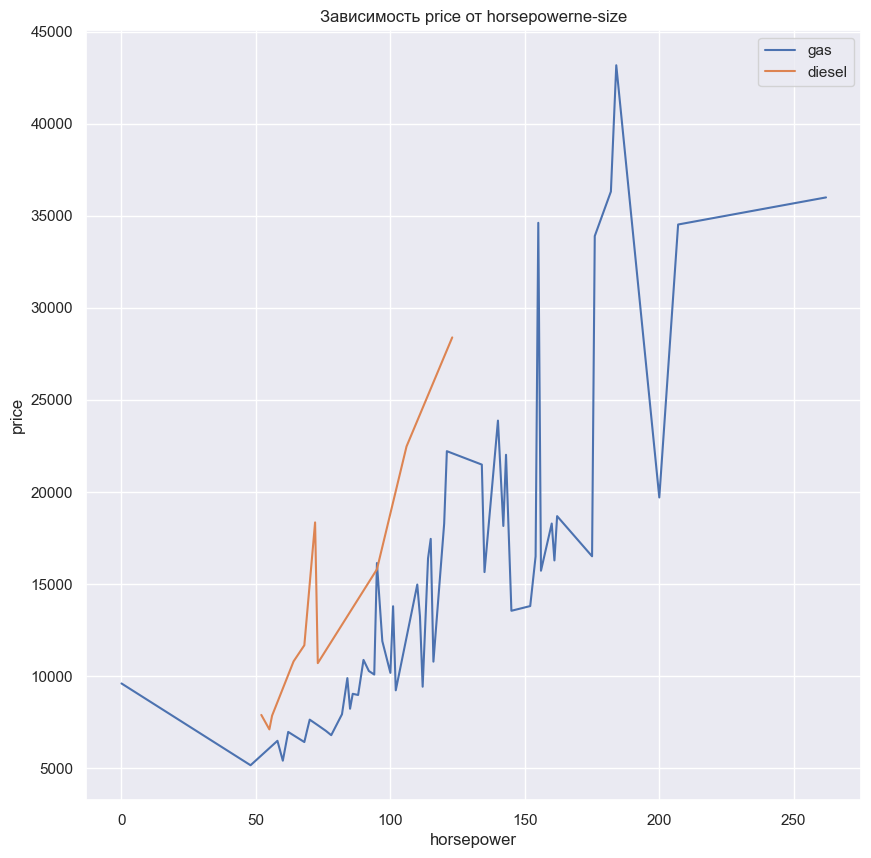

In [40]:
from numpy import mean
from numpy import std


# prepare data
data10 = fall[ fall['fuel-type']=='gas']['price']
data11 = fall[fall['fuel-type']=='diesel']['price']
data20 = fall[ fall['fuel-type']=='gas']['horsepower']
data21 = fall[ fall['fuel-type']=='diesel']['horsepower']
# summarize
print('data10: mean=%.3f stdv=%.3f' % (mean(data10), std(data10)))
print('data20: mean=%.3f stdv=%.3f' % (mean(data20), std(data20)))

print('data11: mean=%.3f stdv=%.3f' % (mean(data11), std(data11)))
print('data21: mean=%.3f stdv=%.3f' % (mean(data21), std(data21)))
# plot
plt.figure(figsize=[10,10])
plt.scatter(data10, data20)
plt.scatter(data11, data21)
plt.title('price та horsepowerne-size')
plt.xlabel('price')
plt.ylabel('horsepower')
plt.legend(['gas','diesel'])

plt.show()


fall1=fall.groupby(["fuel-type"], as_index=False)["price"].count()
print(fall1)

data_1=fall[ fall['fuel-type']=='gas'].groupby(["horsepower"], as_index=False)["price"].mean()

data_2=fall[ fall['fuel-type']=='diesel'].groupby(["horsepower"], as_index=False)["price"].mean()


plt.figure(figsize=[10,10])
plt.plot(data_1['horsepower'], data_1['price'])
plt.plot(data_2['horsepower'], data_2['price'])
plt.title('Зависимость price от horsepowerne-size')
plt.ylabel('price')
plt.xlabel('horsepower')
plt.legend(['gas','diesel'])

plt.show()

  num-of-doors  count
0            ?      2
1         four    113
2          two     86


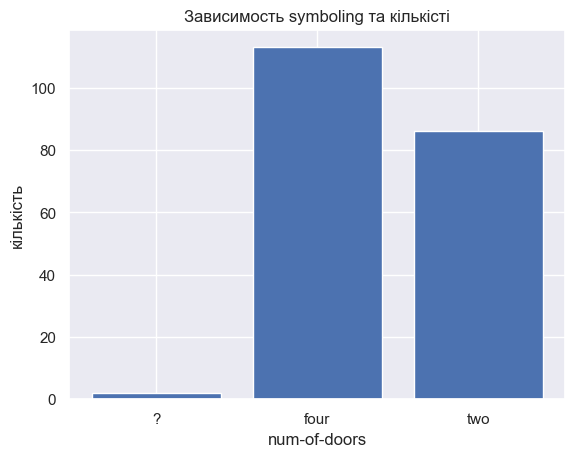

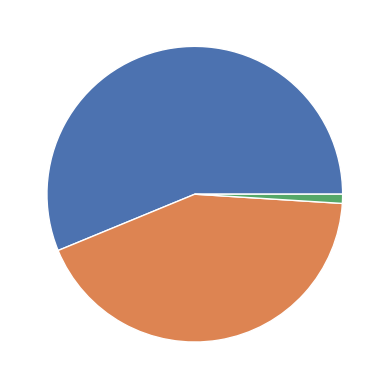

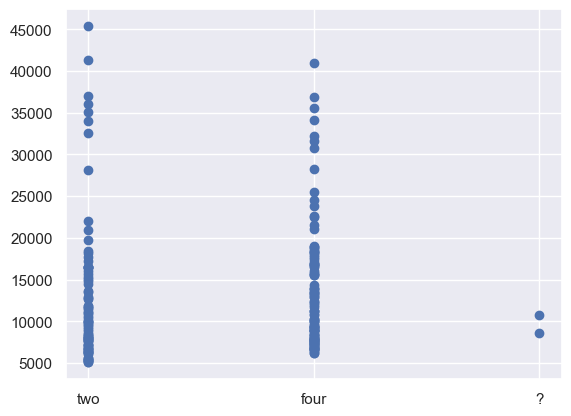

In [41]:
fall_door=fall.groupby(["num-of-doors"], as_index=False)['price'].count()

fall_door=fall.groupby(["num-of-doors"], as_index=False)['price'].agg(count='count')
print(fall_door)
# prepare data
data1 = fall_door['num-of-doors']
data2 = fall_door['count']

# plot
plt.title('Зависимость symboling та кількісті')
plt.xlabel('num-of-doors')
plt.ylabel('кількість')
plt.bar(data1, data2)
plt.show()

data3=fall['num-of-doors'].value_counts()
plt.pie(data3)
plt.show()


data1 = fall['num-of-doors']
data2 = fall['price']
plt.scatter(data1, data2)
plt.show()

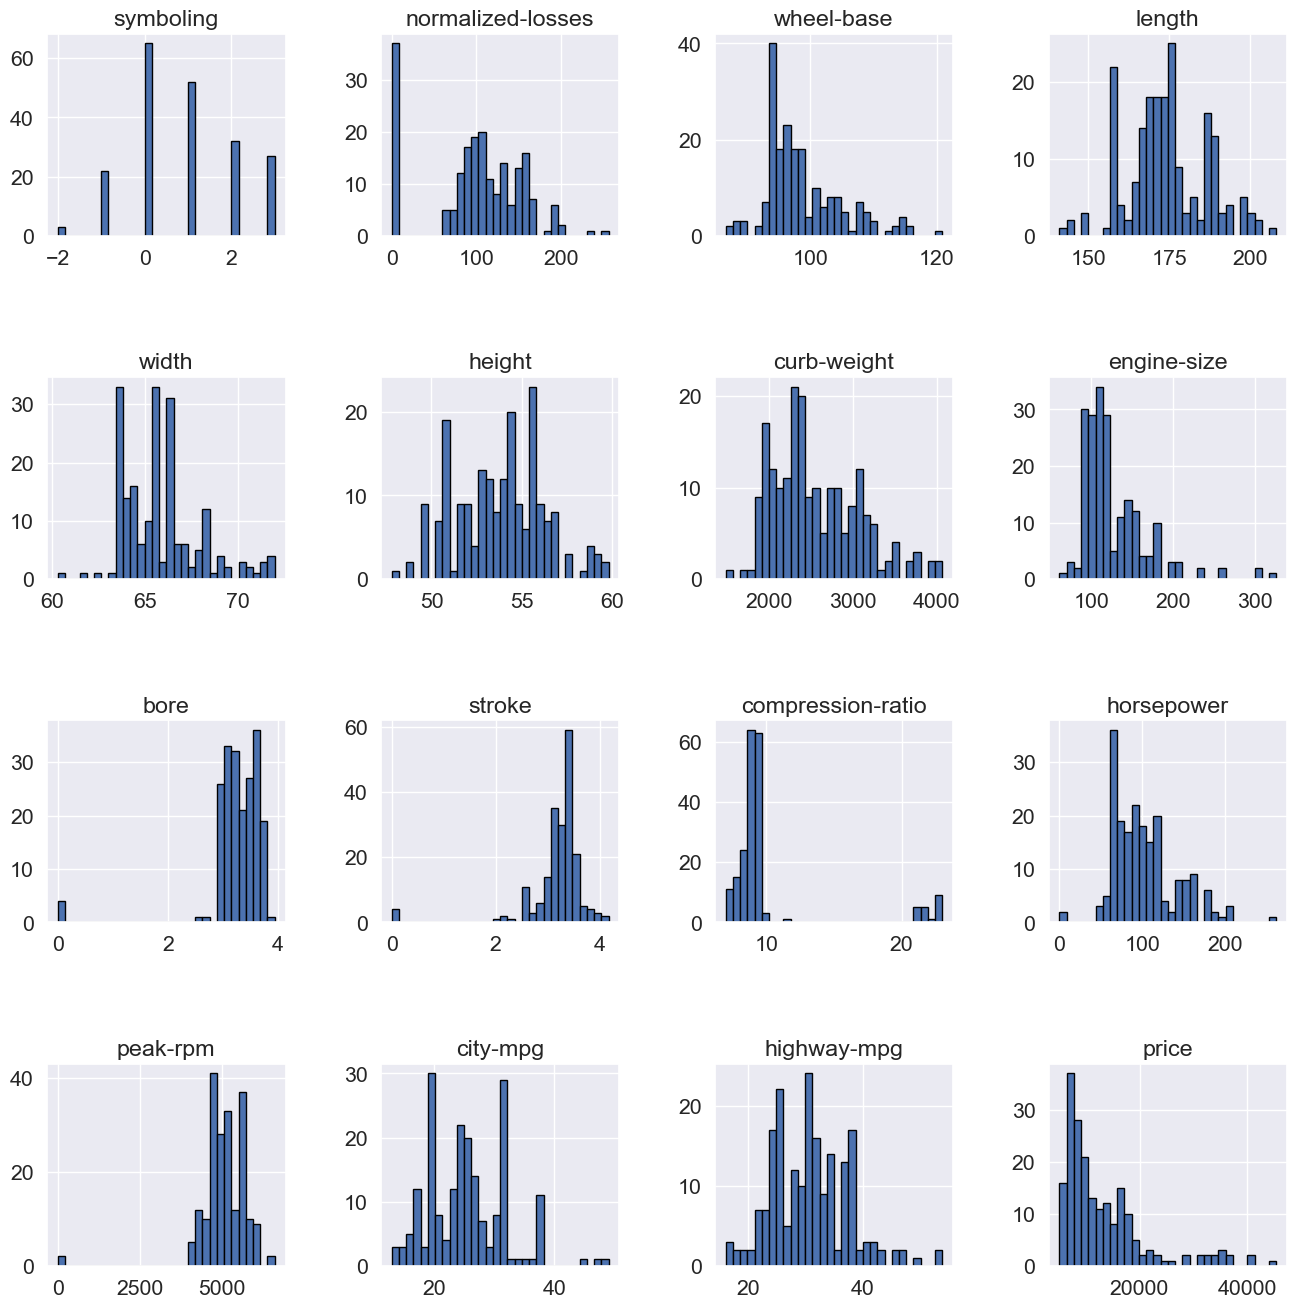

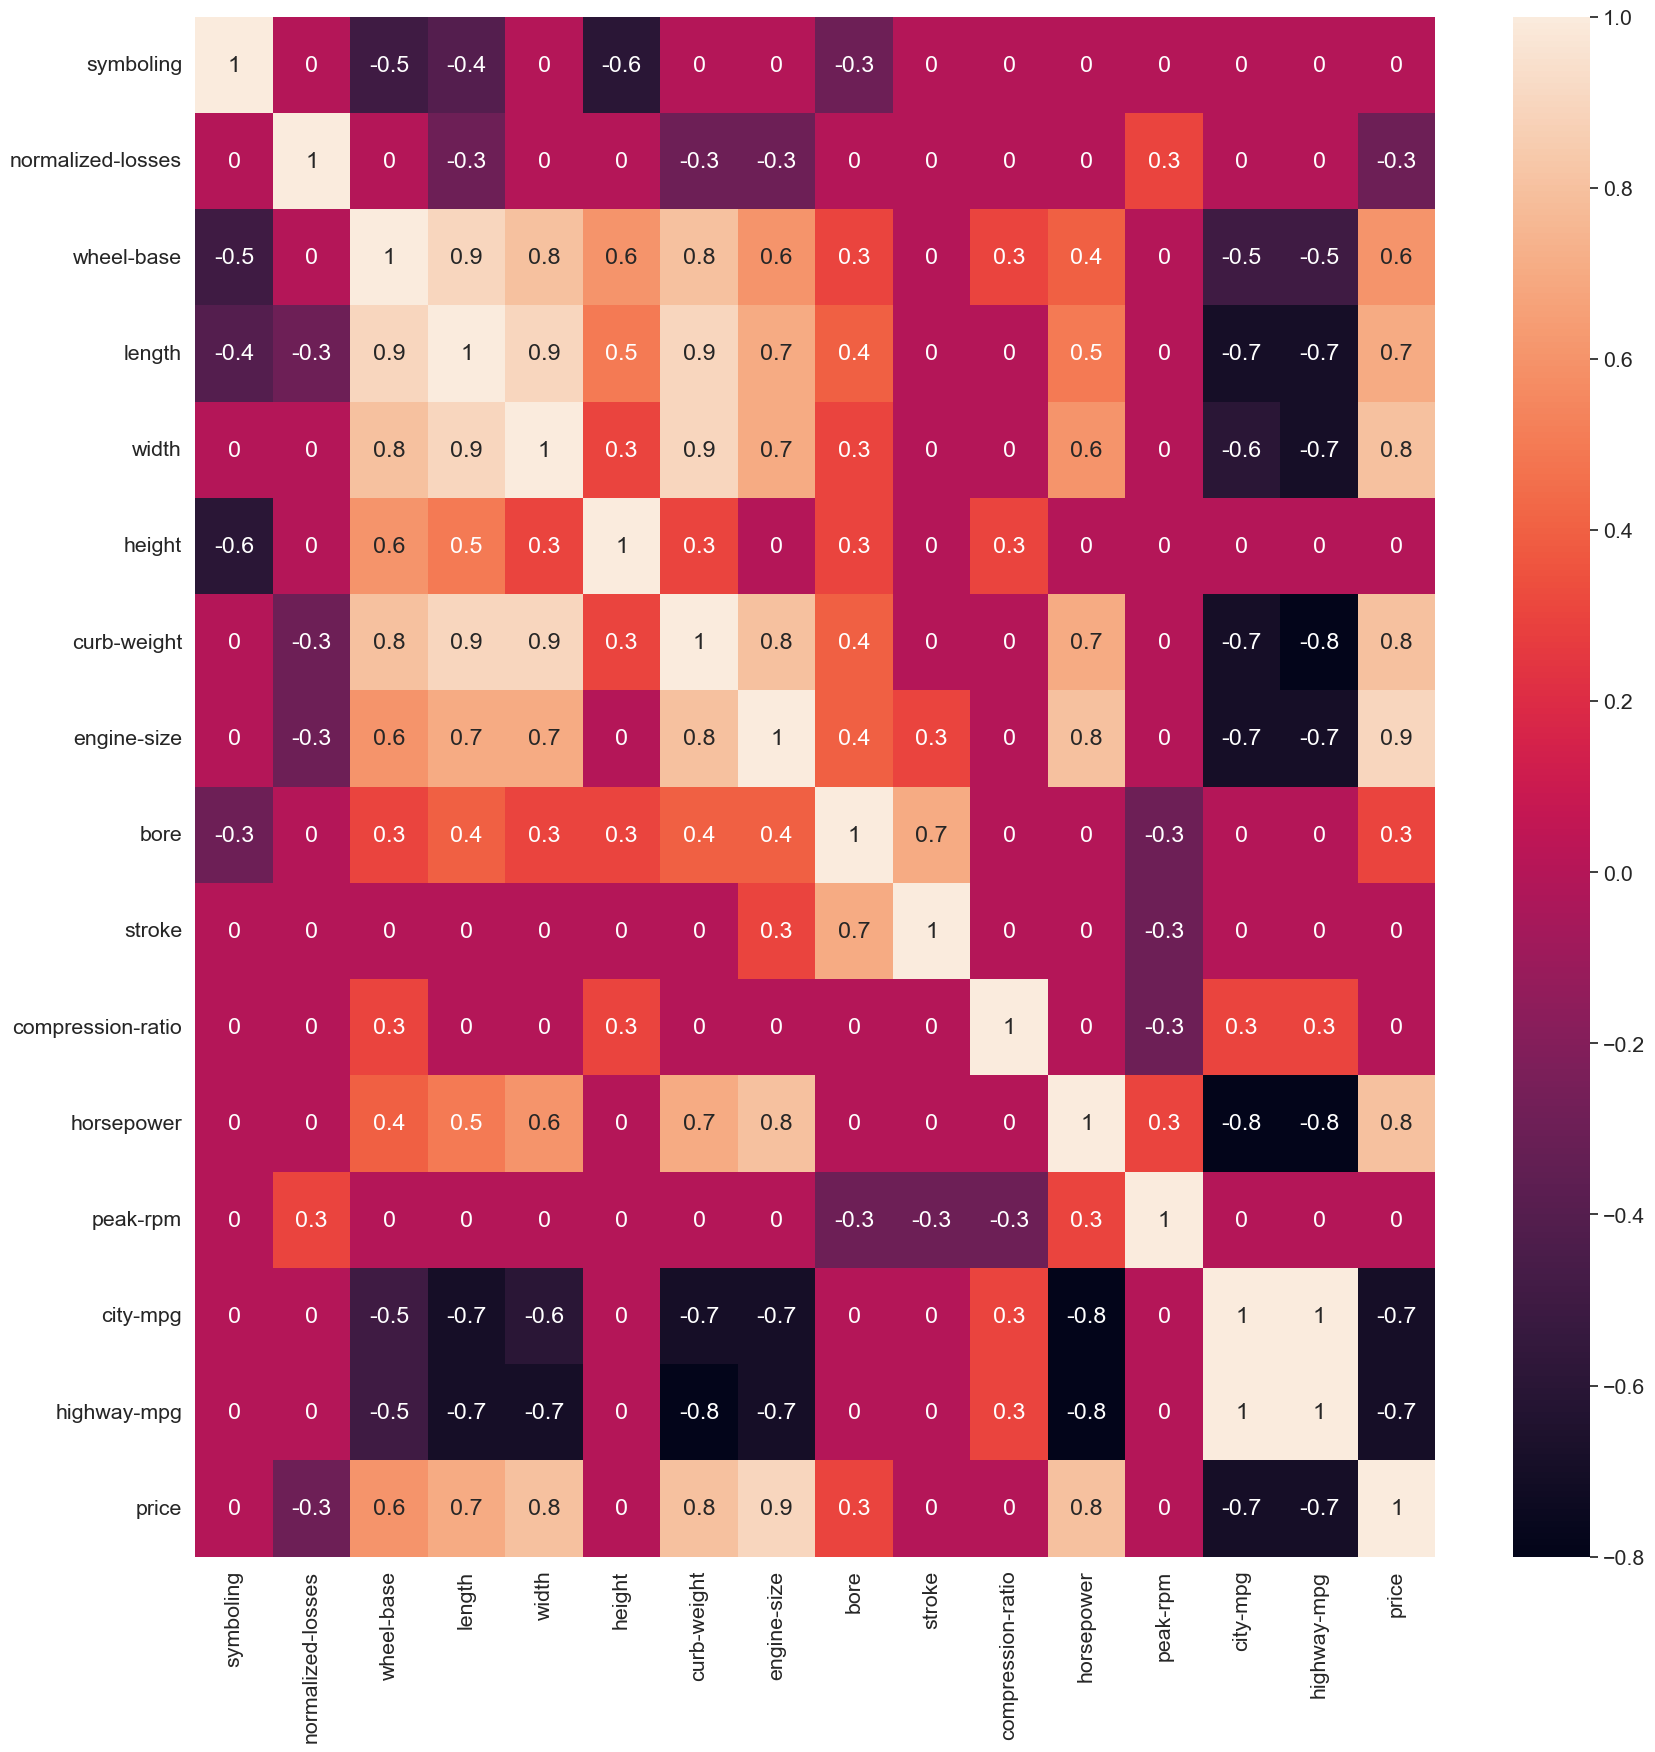

In [56]:
import numpy as np 
import seaborn as sn 
import matplotlib.pyplot as plt 
  
# generating 2-D 10x10 matrix of random numbers 
# from 1 to 100 
fall.iloc [:, [0,1,9,10,11,12,13,16,18,19,20,21,22,23,24,25]].hist(figsize=(16, 16), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)
plt.show()

sn.set(font_scale=1.4)
data = np.round(fall.iloc [:, [0,1,9,10,11,12,13,16,18,19,20,21,22,23,24,25]].corr(),1)
data[np.abs(data)<0.3]=0
#print(data)
plt.figure(figsize=[20,20])
# setting the parameter values 
annot = True
  
# plotting the heatmap 
hm = sn.heatmap(data=data, 
                annot=annot) 
  
# displaying the plotted heatmap 
plt.show() 

data10: mean=12916.409 stdv=7912.973
data20: mean=125.901 stdv=42.303
data11: mean=15838.150 stdv=7563.360
data21: mean=135.700 stdv=31.302


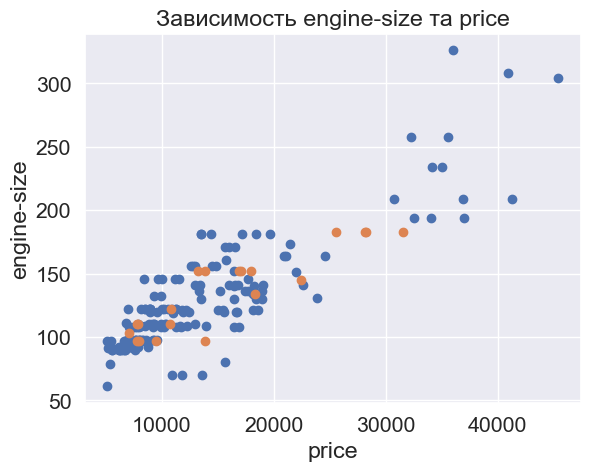

<Figure size 2000x2000 with 0 Axes>

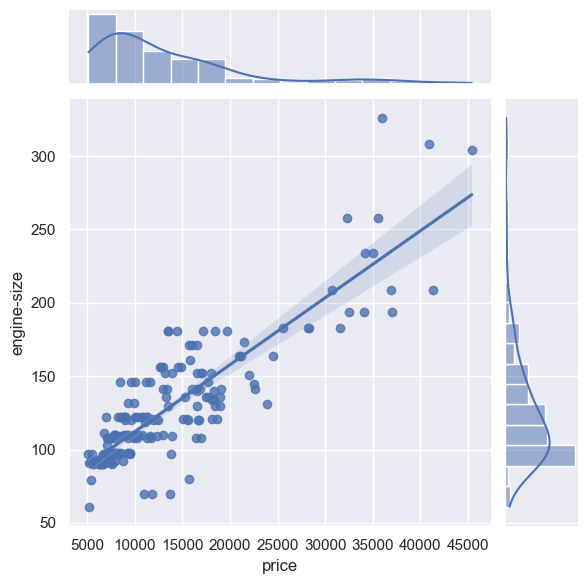

In [43]:
from numpy import mean
from numpy import std
import seaborn as sns 
import matplotlib.pyplot as plt 

# prepare data
data10 = fall[ fall['fuel-type']=='gas']['price']
data11 = fall[fall['fuel-type']=='diesel']['price']
data20 = fall[ fall['fuel-type']=='gas']['engine-size']
data21 = fall[ fall['fuel-type']=='diesel']['engine-size']
# summarize
print('data10: mean=%.3f stdv=%.3f' % (mean(data10), std(data10)))
print('data20: mean=%.3f stdv=%.3f' % (mean(data20), std(data20)))

print('data11: mean=%.3f stdv=%.3f' % (mean(data11), std(data11)))
print('data21: mean=%.3f stdv=%.3f' % (mean(data21), std(data21)))
# plot
plt.title('Зависимость engine-size та price')
plt.xlabel('price')
plt.ylabel('engine-size')
plt.scatter(data10, data20)
plt.scatter(data11, data21)
plt.show()




sns.set(font_scale=1)
# draw jointplot with 
# scatter kind 
plt.figure(figsize=[20,20])
data=fall[["price","engine-size"]] 
sns.jointplot(y = "engine-size", x = "price", kind = 'reg', data = data) 
#grid.fig.set_figwidth(20)
#grid.fig.set_figheight(20)
#grid = sns.jointplot( x = "fuel-type", y = "price", kind = 'reg', data = data ,dropna = True) 
# show the plot 
plt.show() 

In [44]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

# create some synthesized dataset




train_set = fall[["price","engine-size","normalized-losses"]].corr().to_numpy()
#np.array([[1,2,3],[1,4,7],[1,4,9]]) # the first feature have zero variance
# array([[1, 2, 3],
#        [1, 4, 7],
#        [1, 4, 9]])
print(train_set )
test_set = fall[["price","engine-size","symboling"]].corr().to_numpy()
# np.array([[3,2,3],[1,2,7]]) # the second feature have zero variance
# array([[3, 2, 3],
#        [1, 2, 7]])
print("i m")
print(test_set)
selector = VarianceThreshold()
selector.fit(train_set) # fit on trainset
transformed_train = selector.transform(train_set) # transform train set
# the first feature has been removed
# array([[2, 3],
#        [4, 7],
#        [4, 9]])
print(transformed_train)
transformed_test = selector.transform(test_set) # transform test set
# array([[2, 3],
#        [2, 7]])
# although in the test set the second features has zero variance
# but according to train set, we should remove the first feature only
print(transformed_test)

[[ 1.          0.87233517 -0.30817597]
 [ 0.87233517  1.         -0.31264001]
 [-0.30817597 -0.31264001  1.        ]]
i m
[[ 1.          0.87233517 -0.08239119]
 [ 0.87233517  1.         -0.11058056]
 [-0.08239119 -0.11058056  1.        ]]
[[ 1.          0.87233517 -0.30817597]
 [ 0.87233517  1.         -0.31264001]
 [-0.30817597 -0.31264001  1.        ]]
[[ 1.          0.87233517 -0.08239119]
 [ 0.87233517  1.         -0.11058056]
 [-0.08239119 -0.11058056  1.        ]]
